In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import chi2_contingency

In [4]:
df = pd.read_csv('../data/cleaned_data/us_accidents_cleaned_v3.0.csv')

## Hypothesis testing and validation

### Format:  
- Hypothesis:  
H₀ -  
H₁ -  
_This will be tested using:_  
**Result:**

---

Hypothesis 1: More crashes, of a higher severity take place at night, than they do during the day regardless of the weather.  
H₀ - There will be no relationship between severity of crashes and time of day
H₁ - The highest proportion of severe will be at night proving there is a relationship between time of day and intensity of crash  
_This will be tested using:_ A chi-squared test to understand the statistical analysis followed by plotting the data.

**Result:** 
We reject the Null Hypothesis. There is a significant relationship between time of day and severity. The chi-squared test supports this return a pval of 0.0001210779, well below the 0.05 threshold. The visual plots also support this, whilst there are more crashes during the day and the majority of accidents are given a severity rating of two the largest change in percentage between day and night is category 4 crashes increasing by 106%.

--- Contingency Table (Observed Counts) ---
severity    1     2    3   4
day_night                   
Day        23  2756  571  70
Night       7  1141  209  60


Chi-Square Statistic: 20.7075
P-value: 0.0001210779
Degrees of Freedom: 3
------------------------------
RESULT: Statistically Significant (p < 0.05)
We reject the Null Hypothesis. There is a significant relationship between Time of Day and Severity.


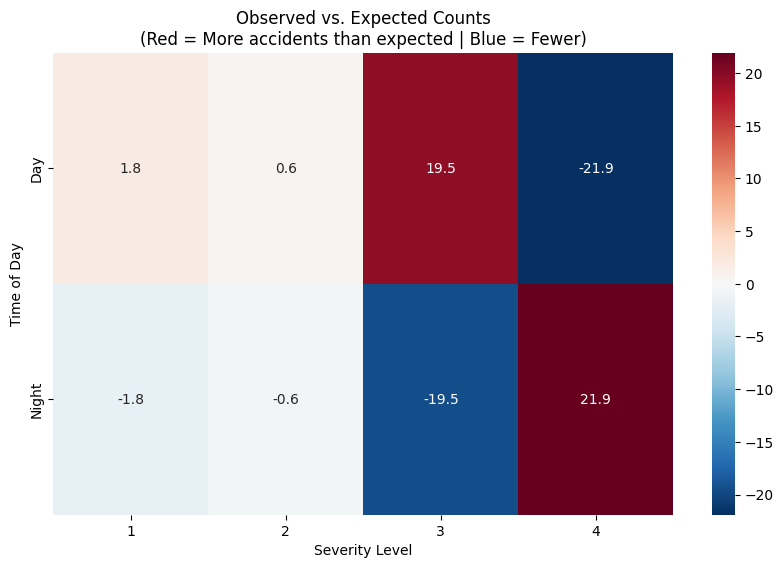

In [26]:
contingency_table = pd.crosstab(df['day_night'], df['severity'])

print("--- Contingency Table (Observed Counts) ---")
print(contingency_table)
print("\n")

chi2, p, dof, expected = chi2_contingency(contingency_table)


print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-value: {p:.10f}")
print(f"Degrees of Freedom: {dof}")

print("-" * 30)
if p < 0.05:
    print("RESULT: Statistically Significant (p < 0.05)")
    print("We reject the Null Hypothesis. There is a significant relationship between Time of Day and Severity.")
else:
    print("RESULT: Not Statistically Significant (p >= 0.05)")
    print("We fail to reject the Null Hypothesis. Time of Day does not appear to impact Severity.")

expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)
residuals = (contingency_table - expected_df)

plt.figure(figsize=(10, 6))
sns.heatmap(residuals, annot=True, fmt=".1f", cmap="RdBu_r", center=0)
plt.title("Observed vs. Expected Counts\n(Red = More accidents than expected | Blue = Fewer)")
plt.xlabel("Severity Level")
plt.ylabel("Time of Day")
plt.show()

In [ ]:
# Create consistent readings of what is day and night
df['day_night'] = df['hour'].apply(lambda x: 'Day' if 6 <= x <= 17 else 'Night')

Text(0.5, 1.0, 'Count of Accidents: Day vs Night')

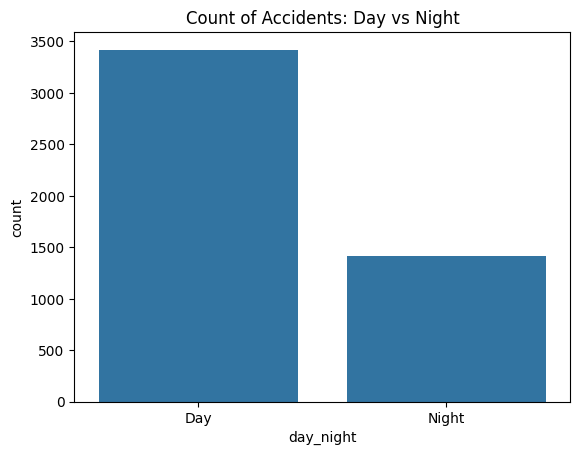

In [ ]:
# Plot count of crashes at day v night
sns.countplot(data=df, x='day_night')
plt.title('Count of Accidents: Day vs Night')

In [ ]:
# Plotly visual of severity of crash by hour
fig = px.histogram(
    df, 
    x="hour", 
    color="severity", 
    facet_col="day_night", 
    nbins=24,
    title="Accident Severity by Hour: Day vs Night",
    labels={'hour': 'Hour of Day', 'count': 'Number of accidents'},
    color_discrete_sequence=px.colors.qualitative.Safe,
    barmode='stack' # You can change this to 'group' for side-by-side bars
)

# Improve layout
fig.update_layout(bargap=0.1)
fig.show()

# To save correctly:
# fig.write_image("severity_hourly_distribution.png")

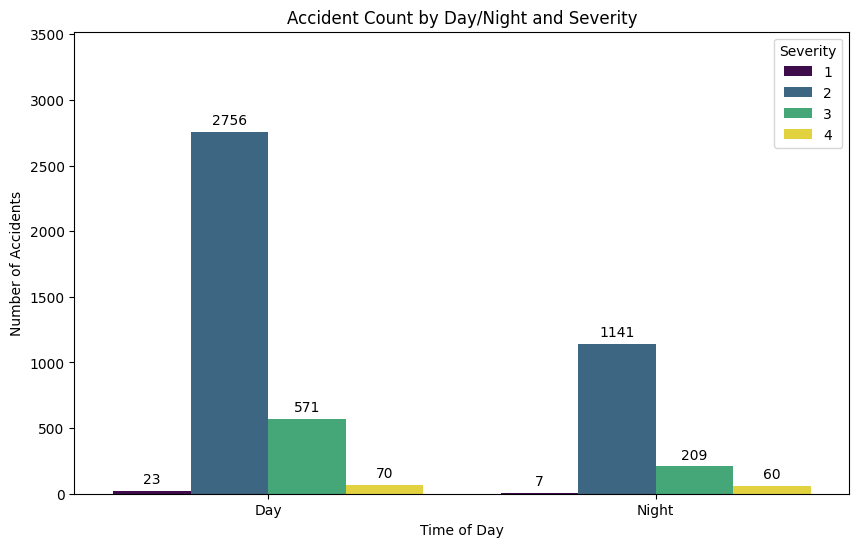

In [ ]:
# Counts of crash by hour and severity
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='day_night', hue='severity', palette='viridis')

for container in ax.containers:
    ax.bar_label(container, padding=3)

plt.title('Accident Count by Day/Night and Severity')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.ylim(0, df['day_night'].value_counts().max() + 100) # Give some space for labels
plt.legend(title='Severity')
plt.show()

## Accident Severity Distribution

### DAY
| Severity Level | Percentage (%) |
| :---: | :---: |
| 1 | 0.67 |
| 2 | 80.58 |
| 3 | 16.70 |
| 4 | 2.05 |

---

### NIGHT
| Severity Level | Percentage (%) |
| :---: | :---: |
| 1 | 0.49 |
| 2 | 80.52 |
| 3 | 14.75 |
| 4 | 4.23 |


---

The data reveals a critical trend: while Severity 2 remains the baseline for both periods, the proportion of Severity 4 (Most Severe) accidents **increases by 106%** during the night compared to the day.